# Plot for comparing spread

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import sys
sys.path.append("..")
#import os
from utils.model import Net_mask
#from utils.data import Data
#from utils.loss_experiment import Loss
#from scripts.parameters import get_parameters
import torch
#import numpy as np
import matplotlib.pyplot as plt

In [13]:
model_map = Net_mask()
model_map.load_state_dict(torch.load(f'../saved_models/models_infinite_data/ML/model_weights.pth'))

<All keys matched successfully>

In [14]:
def plot_comp_spread(num, n_points=None):
    tensor_raw = torch.load('../data/test_observations/all_test_observations.pt')[num,:].unsqueeze(0)
    post_mean = torch.load('../data/test_observations/all_test_solutions.pt')[num,:]
    n_param = 10
    input_tensor = tensor_raw[0]
    mask = input_tensor[10:]
    location_raw = torch.where(mask > 0.5)
    location = location_raw[0]
    points = tensor_raw[0][location_raw]

    # Plotting model estimates
    model = Net_mask()
    map_estimate = model_map(tensor_raw)[0].detach()

    #names = []
    sum_tensor_map = torch.zeros(n_param)

    n_runs = 100
    plt.figure()
    #plt.plot(range(10), map_estimate, 'b')
    #plt.plot(range(10), post_mean, 'r')
    sum_tensor_bnn = torch.zeros(n_param)
    plt.subplot(1,2,1)
    for f in range(n_runs): 
        name = f'../saved_models/rml/short/e4/pos/{f}/model_weights.pth'
        model.load_state_dict(torch.load(name))
        model.eval()
        out_raw = model(tensor_raw)
        out = out_raw[0].detach()
        sum_tensor_bnn += out
        plt.plot(range(10), out, alpha=1)#, 'o')
    #plt.plot(range(10), sum_tensor_bnn/n_runs, 'r')

    plt.title('RML-e4 100 runs')
    #plt.plot(range(10), post_mean, 'r')
    #plt.plot(range(10), map_estimate, 'b')
    plt.plot(location, points, 'ko')
    plt.xlabel("m")
    plt.ylabel("m|d")
    #plt.legend(['Analytical', 'map'])#, 'Bagged BNN', 'MAP'])
    plt.axis([-0.5, 9.5, -2.5, 2.5])
    #plt.savefig(f'../figures/plot_RML_e4_RML_e5/plot_RML_e4_RML_e5_{n_points}.png')

    sum_tensor_map = torch.zeros(n_param)
    n_runs = 100
    plt.subplot(1,2,2)
    for f in range(n_runs): 
        name = f'../saved_models/rml/short/e5/pos/{f}/model_weights.pth'
        model.load_state_dict(torch.load(name))
        model.eval()
        out_raw = model(tensor_raw)
        out = out_raw[0].detach()
        sum_tensor_map += out
        plt.plot(range(10), out, alpha=1)#, 'o')
    #plt.plot(range(10), sum_tensor_map/n_runs, 'r')

    plt.title('RML-e5 100 runs')
    #plt.plot(range(10), map_estimate, 'b')
    #plt.plot(range(10), post_mean, 'r')
    plt.plot(location, points, 'ko')
    plt.xlabel("m")
    plt.ylabel("m|d")
    #plt.legend(['Analytical', 'map'])#, 'Bagged BNN', 'MAP'])
    plt.axis([-0.5, 9.5, -2.5, 2.5])
    plt.savefig(f'../figures/plot_RML_e4_RML_e5/plot_RML_e4_RML_e5_{n_points}.png')

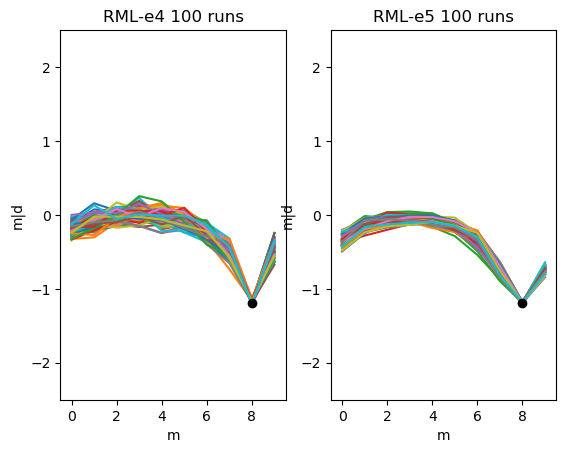

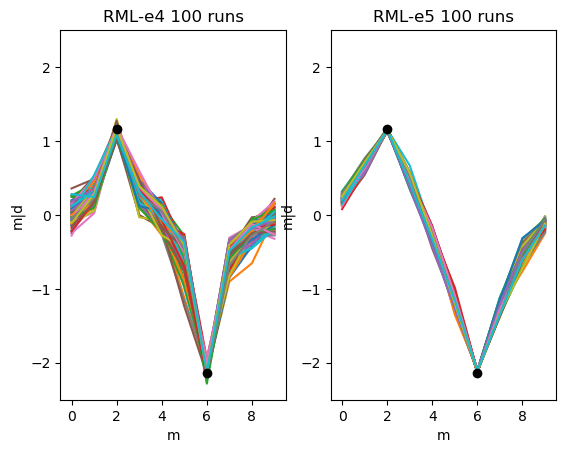

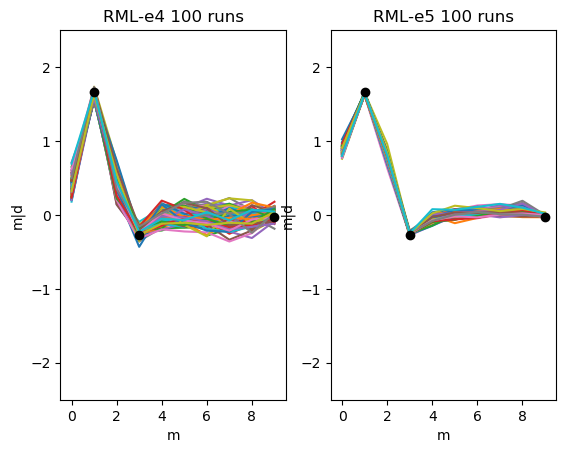

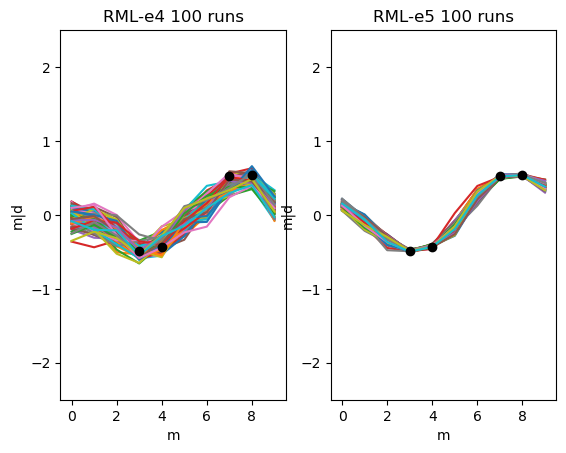

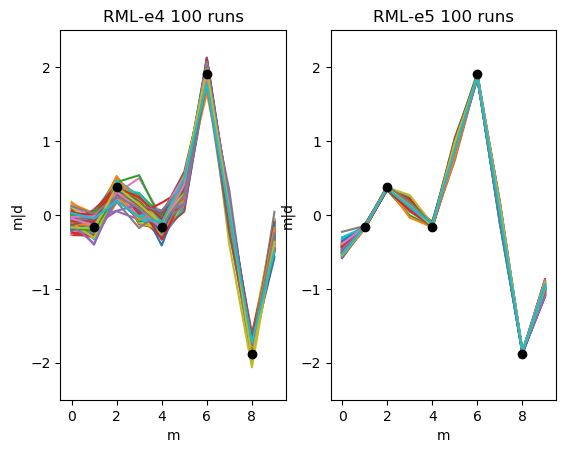

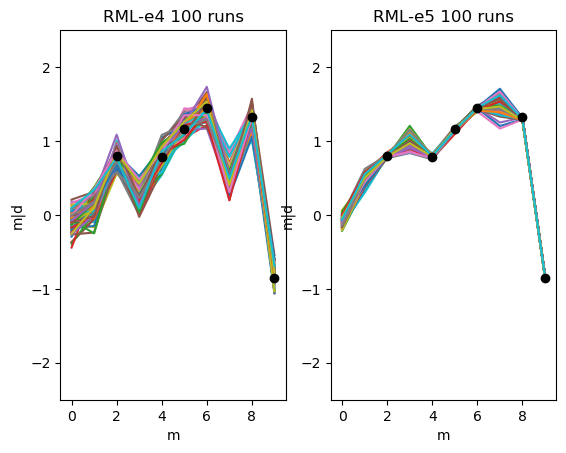

In [15]:
#n_points = 3
i = 0
#for i in range(6):
for n_points in range(1, 7):
    plot_comp_spread(int(f'{n_points}{i}'), n_points=n_points)